In [1]:
import pandas as pd


In [32]:
from scipy.stats import gamma
from scipy.stats import poisson

## Activity 03

Today you will work with an example of the Poisson distribution.

More specifically, you are considering writing a proposal to build a telescope that will perform the ultimate measurement of the expansion rate of the Universe, using distances derived from Type Ia SNae (White Dwarf Supernovae).
Assume that in order to effectively measure the expansion rate you need at least 100 SNae.

You decide that the best strategy to quickly get to your minimum number of SNae is to observe galaxy clusters (more galaxies, more SNae!). To plan the survey, i.e. to decide for how long you should observe, you need to know what the rate of SNIa is per cluster. 

After you search the literature for a day, however, the only information you can find is a [paper](https://www.aanda.org/articles/aa/pdf/2004/09/aah3971.pdf) presenting the results of the Mount Stromlo search for SNae in Abell galaxy clusters -- so not quite what you wanted, but close!!

You will use the reported data (see below) to estimate the number of Type Ia SN explosions per year, per cluster.

> **More on the Survey** 
The Mount Stromlo and Siding Springs Observatories (MSSSO) 1.3 m telescope was used to target all southern, high-density clusters lying within z < 0.08, from the Abell et al. (1989) survey of nearby, rich galaxy clusters. Search observations were scheduled so that each cluster was revisited approximately every 10 days allowing the discovery  of SNIa suitable for distance work. The search uncovered 48 SNae during its 3.5 year campaign, 23 of which were found to be consistent with SNIa.
>
In total the survey targeted 74 clusters.

The file "MountStrombloAbellClusterSN_Survey.dat" includes the spectral classification (i.e., whether or not a SN is of Type Ia) for all the recorded 48 SNae. The classification can be: **nIa**(=not a Ia), **IIpec**(=a Type II),  **Ia**(=secure Type Ia) or **Ia?**(=possible Type Ia). 

You are writing a proposal, so you will be optimistic in your analysis, and in addition to all secure Type Ia SNae you will also include all **Ia?** in your sample. Compute the rate of SNae Ia per cluster, and estimate how long it will take you to complete the survey, if the field of view of your proposed telescope can only cover 5 galaxy clusters. 

In the analysis, as usual, follow the best practice guidelines posted on Canvas.  

[**HINT**: don't forget the clusters for which SNae are NOT detected!]


### If you have extra time at the end:

Consider the original 1987 data from the Kamioka and IMB detectors and reported in the slides presented on Monday. 

In lecture Galin summarized the results for each experiments with one number. Explore whether the results change if you instead bin the data differently. 


In [10]:
df = pd.read_table('MountStrombloAbellClusterSN_Survey.dat', sep='\s+', names=['SN', 'Abell', 'Type'], skiprows=1)

In [11]:
df

,SN,Abell,Type
0,1996af,3879,nIa
1,1996ag,3809,Ia?
2,1996aj,3559,Ia
3,1996am,3809,Ia
4,1996ao,3128,Ia
5,1996ap,3806,nIa
6,1996bm,2819,nIa
7,1996bx,3202,Ia
8,1997by,1736,Ia
9,1997bz,1238,Ia


In [21]:
sn = df['SN']
sn = sn.isdigi

In [23]:
df['year'] = df['SN'].str.extract('(\d{4})', expand=True).astype(int)

In [24]:
df

,SN,Abell,Type,year
0,1996af,3879,nIa,1996
1,1996ag,3809,Ia?,1996
2,1996aj,3559,Ia,1996
3,1996am,3809,Ia,1996
4,1996ao,3128,Ia,1996
5,1996ap,3806,nIa,1996
6,1996bm,2819,nIa,1996
7,1996bx,3202,Ia,1996
8,1997by,1736,Ia,1997
9,1997bz,1238,Ia,1997


In [25]:
num = df['Type'].value_counts()

In [26]:
num

nIa      21
Ia       15
Ia?       8
II        2
IIn       1
IIpec     1
Name: Type, dtype: int64

In [29]:
type_1a = num['Ia'] + num['Ia?']

In [31]:
time_frame = 3.5

In [33]:
import numpy as np

In [116]:
a = 10
b = 1/2
lins = np.linspace(0, 100, 1000)
y = gamma.pdf(lins, a, scale=1/b)

In [117]:
from matplotlib import pyplot as plt

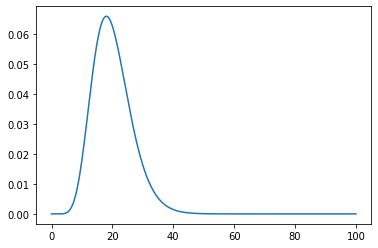

In [118]:
plt.plot(lins, y)

In [119]:
#the gamma distribution that we are using is the first form that was introduced in the class

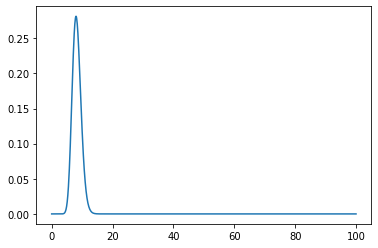

In [121]:
post_a = a + type_1a
post_b = b + time_frame
y_post = gamma.pdf(lins, post_a, scale=1/post_b)
plt.plot(lins, y_post)

In [122]:
gamma.mean(post_a, scale=1/post_b)

8.25

Thus we can say that we have 8.25 rate for $\theta$ that means 8.25/74 per cluster

In [123]:
8.25/74*5

0.5574324324324325

That means 0.5574 for 5 clusters thus to observe 100 SN type 1 we should probably observe for 200 years

